# **Contexte**


La maladie d'Alzheimer est une maladie neurodégénérative progressive qui affecte la mémoire, la pensée et le comportement. Un diagnostic précoce et précis est crucial pour une prise en charge optimale et pour la recherche de traitements, étant donné l'absence actuelle de remède. Distinguer les stades de la maladie ou l'absence de démence est essentiel pour la recherche et l'amélioration de la qualité de vie des patients.

Ce projet utilise un dataset synthétique riche, conçu pour explorer les facteurs liés à l'Alzheimer et développer des modèles prédictifs. Il contient une variété de caractéristiques : démographiques, comportementales, cliniques et liées aux habitudes de vie. Cela inclut l'âge, les antécédents familiaux, le niveau d'éducation, le tabagisme, l'activité physique, l'alimentation, le sommeil, la tension artérielle, le cholestérol, ainsi que les scores d'évaluation cognitive (MMSE, ADL) et divers symptômes.

Chaque entrée dans le dataset représente un patient, décrit par ces caractéristiques. La variable cible est le diagnostic de la maladie d'Alzheimer, qui sera traitée comme une tâche de classification (présence ou absence de la maladie, ou ses différents stades).

L'objectif de ce projet est de développer des modèles de prédiction précis capables d'utiliser les caractéristiques fournies pour anticiper avec justesse le diagnostic de la maladie d'Alzheimer. Ces modèles pourraient potentiellement aider les professionnels de la santé à prendre des décisions éclairées, en identifiant rapidement les individus à risque ou ceux nécessitant une évaluation médicale approfondie. En conséquence, cela pourrait contribuer à améliorer la détection précoce de la maladie et la qualité de vie des patients affectés.

# **Problématique**



Face à la complexité et à la nature progressive de la maladie d'Alzheimer, un diagnostic précoce et précis reste un défi majeur. Les données cliniques et comportementales des patients étant multiples et hétérogènes, comment peut-on développer un modèle de Deep Learning capable d'extraire efficacement les informations pertinentes de ces nombreuses caractéristiques pour prédire de manière fiable le diagnostic d'Alzheimer, en s'appuyant sur une représentation de données plus compacte et optimisée ?

# **Analyse descriptive**

In [2]:
# Importation des librairies
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk 

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [3]:
# Chargement du dataset
data = pd.read_csv("alzheimers_disease_data.csv", header=0)

In [4]:
# Aperçu du dataset (affiche les 3 premières lignes)
data.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Description des attributs

Ce dataset contient des informations détaillées pour 2 149 patients, chaque variable offrant un aperçu unique sur les facteurs associés à la maladie d'Alzheimer.

### A. Informations Patient :
1.  **PatientID**: Un identifiant unique assigné à chaque patient (de 4751 à 6900).

### B. Détails Démographiques :
2.  **Age**: L'âge du patient en années, variant de 60 à 90 ans.
3.  **Gender**: Le sexe du patient, où 0 représente Male et 1 représente Female.
4.  **Ethnicity**: L'origine ethnique du patient, codée comme suit : 0 (Caucasien), 1 (Afro-Américain), 2 (Asiatique), 3 (Autre).
5.  **EducationLevel**: Le niveau d'éducation atteint par le patient, codé comme suit : 0 (Aucun), 1 (Lycée), 2 (Licence), 3 (Supérieur).

### C. Facteurs Liés au Mode de Vie :
6.  **BMI**: L'Indice de Masse Corporelle du patient, variant de 15 à 40.
7.  **Smoking**: Statut tabagique du patient, où 0 indique l'absence de tabagisme et 1 indique sa présence.
8.  **AlcoholConsumption**: La consommation hebdomadaire d'alcool du patient en unités, variant de 0 à 20.
9.  **PhysicalActivity**: Le niveau d'activité physique hebdomadaire du patient en heures, variant de 0 à 10.
10. **DietQuality**: Un score de qualité de l'alimentation du patient, variant de 0 à 10.
11. **SleepQuality**: Un score de qualité du sommeil du patient, variant de 4 à 10.

### D. Antécédents Médicaux :
12. **FamilyHistoryAlzheimers**: Indique la présence d'antécédents familiaux de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.
13. **CardiovascularDisease**: Indique la présence de maladies cardiovasculaires, où 0 indique Non et 1 indique Oui.
14. **Diabetes**: Indique la présence de diabète, où 0 indique Non et 1 indique Oui.
15. **Depression**: Indique la présence de dépression, où 0 indique Non et 1 indique Oui.
16. **HeadInjury**: Indique des antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui.
17. **Hypertension**: Indique la présence d'hypertension, où 0 indique Non et 1 indique Oui.

### E. Mesures Cliniques :
18. **SystolicBP**: Pression artérielle systolique du patient, variant de 90 à 180 mmHg.
19. **DiastolicBP**: Pression artérielle diastolique du patient, variant de 60 à 120 mmHg.
20. **CholesterolTotal**: Niveaux de cholestérol total du patient, variant de 150 à 300 mg/dL.
21. **CholesterolLDL**: Niveaux de cholestérol LDL (lipoprotéines de basse densité) du patient, variant de 50 à 200 mg/dL.
22. **CholesterolHDL**: Niveaux de cholestérol HDL (lipoprotéines de haute densité) du patient, variant de 20 à 100 mg/dL.
23. **CholesterolTriglycerides**: Niveaux de triglycérides du patient, variant de 50 à 400 mg/dL.

### F. Évaluations Cognitives et Fonctionnelles :
24. **MMSE**: Score du Mini-Mental State Examination, un test d'évaluation cognitive, variant de 0 à 30 (les scores plus bas indiquent une déficience cognitive).
25. **FunctionalAssessment**: Score d'évaluation fonctionnelle, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les activités complexes).
26. **MemoryComplaints**: Indique la présence de plaintes de mémoire chez le patient, où 0 indique Non et 1 indique Oui.
27. **BehavioralProblems**: Indique la présence de problèmes comportementaux chez le patient, où 0 indique Non et 1 indique Oui.
28. **ADL (Activities of Daily Living)**: Score des Activités de la Vie Quotidienne, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les tâches quotidiennes de base).

### G. Symptômes :
29. **Confusion**: Indique la présence de confusion chez le patient, où 0 indique Non et 1 indique Oui.
30. **Disorientation**: Indique la présence de désorientation chez le patient, où 0 indique Non et 1 indique Oui.
31. **PersonalityChanges**: Indique la présence de changements de personnalité chez le patient, où 0 indique Non et 1 indique Oui.
32. **DifficultyCompletingTasks**: Indique la présence de difficultés à accomplir des tâches chez le patient, où 0 indique Non et 1 indique Oui.
33. **Forgetfulness**: Indique la présence d'oublis fréquents chez le patient, où 0 indique Non et 1 indique Oui.

### H. Informations de Diagnostic :
34. **Diagnosis**: Le statut de diagnostic final pour la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.


## Information sur le dataset 

In [5]:
# Prévisualisation des type de données de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

**EXPLICATION** <br>
Par exemple, la ligne *diagnosis 2149 non-null object* signifie que le "diagnosis" a une valeur de 2149 de type int <br>
Cette dataset possède deux types de valeurs : float et int.

In [6]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [7]:
# Elimination de la colonne ID et Unnamed: 32
data.drop(data.columns[[0]], axis=1)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [8]:
# 1. Démographie et mode de vie (colonnes 1 à 11)
group_demographics_lifestyle = list(data.columns[1:12])

# 2. Médical et clinique (colonnes 12 à 23)
group_medical_clinical = list(data.columns[12:24])

# 3. Cognitif, fonctionnel et symptômes (colonnes 24 à 33)
group_cognitive_symptoms = list(data.columns[24:34])

print("Démographie et mode de vie :", group_demographics_lifestyle)
print("Médical et clinique :", group_medical_clinical)
print("Cognitif, fonctionnel et symptômes :", group_cognitive_symptoms)

Démographie et mode de vie : ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers']
Médical et clinique : ['CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE']
Cognitif, fonctionnel et symptômes : ['FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


## Réduction du nombre des attributs

Pour notre projet, nous avons identifié 22 variables jugées les plus pertinentes parmi le dataset "Alzheimer's Disease Dataset" de Kaggle. Ces variables serviront de base à l'entraînement de notre auto-encodeur, qui aura pour objectif de générer une représentation latente pour notre Réseau de Neurones Artificiels (ANN).

Ces 22 variables ont été choisies pour leur pertinence dans la modélisation de la maladie d'Alzheimer, couvrant des aspects démographiques, de mode de vie, d'antécédents médicaux, cliniques, cognitifs, fonctionnels et comportementaux.

In [8]:
selected_columns = [
    'Age',
    'Gender',
    'Ethnicity',
    'EducationLevel',
    'BMI',
    'Smoking',
    'SleepQuality',
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease',
    'Diabetes',
    'Depression',
    'HeadInjury',
    'Hypertension',
    'SystolicBP',
    'CholesterolTotal',
    'MMSE',
    'FunctionalAssessment',
    'MemoryComplaints',
    'BehavioralProblems',
    'ADL',
    'Confusion',
    'Diagnosis'
]

data_reduced = data[selected_columns]
data_reduced.head()


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,Hypertension,SystolicBP,CholesterolTotal,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Diagnosis
0,73,0,0,2,22.927749,0,9.025679,0,0,1,...,0,142,242.366840,21.463532,6.518877,0,0,1.725883,0,0
1,89,0,0,0,26.827681,0,7.151293,0,0,0,...,0,115,231.162595,20.613267,7.118696,0,0,2.592424,0,0
2,73,0,3,1,17.795882,0,9.673574,1,0,0,...,0,99,284.181858,7.356249,5.895077,0,0,7.119548,0,0
3,74,1,0,1,33.800817,1,8.392554,0,0,0,...,0,118,159.582240,13.991127,8.965106,0,1,6.481226,0,0
4,89,0,0,0,20.716974,0,5.597238,0,0,0,...,0,94,237.602184,13.517609,6.045039,0,0,0.014691,0,0


In [9]:
# data = data_reduced

In [10]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

### Description des 22 attributs retenu


Voici la liste des attributs sélectionnées, regroupées par catégories pour une meilleure compréhension :

#### A. Détails Démographiques :
1.  **Age**: L'âge du patient en années, variant de 60 à 90 ans.
2.  **Gender**: Le sexe du patient, où 0 représente Male et 1 représente Female.
3.  **Ethnicity**: L'origine ethnique du patient, codée comme suit : 0 (Caucasien), 1 (Afro-Américain), 2 (Asiatique), 3 (Autre).
4.  **EducationLevel**: Le niveau d'éducation atteint par le patient, codé comme suit : 0 (Aucun), 1 (Lycée), 2 (Licence), 3 (Supérieur).

#### B. Facteurs Liés au Mode de Vie :
5.  **BMI**: L'Indice de Masse Corporelle du patient, variant de 15 à 40.
6.  **Smoking**: Statut tabagique du patient, où 0 indique l'absence de tabagisme et 1 indique sa présence.
7.  **SleepQuality**: Un score de qualité du sommeil du patient, variant de 4 à 10.

#### C. Antécédents Médicaux :
8.  **FamilyHistoryAlzheimers**: Indique la présence d'antécédents familiaux de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.
9.  **CardiovascularDisease**: Indique la présence de maladies cardiovasculaires, où 0 indique Non et 1 indique Oui.
10. **Diabetes**: Indique la présence de diabète, où 0 indique Non et 1 indique Oui.
11. **Depression**: Indique la présence de dépression, où 0 indique Non et 1 indique Oui.
12. **HeadInjury**: Indique des antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui.
13. **Hypertension**: Indique la présence d'hypertension, où 0 indique Non et 1 indique Oui.

#### D. Mesures Cliniques :
14. **SystolicBP**: Pression artérielle systolique du patient, variant de 90 à 180 mmHg.
15. **CholesterolTotal**: Niveaux de cholestérol total du patient, variant de 150 à 300 mg/dL.

#### E. Évaluations Cognitives et Fonctionnelles :
16. **MMSE**: Score du Mini-Mental State Examination, un test d'évaluation cognitive, variant de 0 à 30 (les scores plus bas indiquent une déficience cognitive).
17. **FunctionalAssessment**: Score d'évaluation fonctionnelle, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les activités complexes).
18. **MemoryComplaints**: Indique la présence de plaintes de mémoire chez le patient, où 0 indique Non et 1 indique Oui.
19. **BehavioralProblems**: Indique la présence de problèmes comportementaux chez le patient, où 0 indique Non et 1 indique Oui.
20. **ADL (Activities of Daily Living)**: Score des Activités de la Vie Quotidienne, variant de 0 à 10 (les scores plus bas indiquent une déficience plus importante dans les tâches quotidiennes de base).

#### F. Symptômes :
21. **Confusion**: Indique la présence de confusion chez le patient, où 0 indique Non et 1 indique Oui.
<!-- 22. **Disorientation**: Indique la présence de désorientation chez le patient, où 0 indique Non et 1 indique Oui. -->

#### H. Informations de Diagnostic :
22. **Diagnosis**: Le statut de diagnostic final pour la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.

In [11]:
# Divisons les variables selon leur category
features_mean= list(data.columns[1:12])
features_se= list(data.columns[12:23])
features_worst=list(data.columns[23:33])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers']
-----------------------------------
['CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
------------------------------------
['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']


## Statistique descriptive 

In [12]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


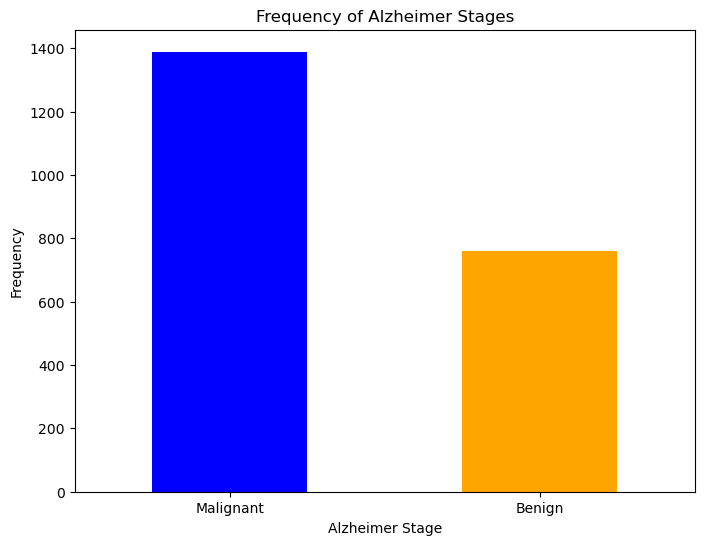

In [13]:
# Fréquence des stades du Alzheimer
frequency = data['Diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
frequency.plot(kind='bar', color=['blue', 'orange'])
plt.title('Frequency of Alzheimer Stages')
plt.xlabel('Alzheimer Stage')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Malignant', 'Benign'], rotation=0)
plt.show()

Ce graphique montre la répartition des diagnostics d'Alzheimer dans le dataset.  
L'axe des x représente les deux classes : **"Malignant"** (Alzheimer) et **"Benign"** (non Alzheimer).  
L'axe des y indique le nombre de patients dans chaque catégorie.  
On observe que la majorité des patients sont dans la classe **"Benign"** (non Alzheimer), tandis qu'une proportion plus faible est diagnostiquée **"Malignant"** (Alzheimer).  
Cela met en évidence un déséquilibre de classes, ce qui est courant dans les jeux de données médicaux.


# Analyse diagnostique

Sur ce graphe, nous pouvons constater qu'il y a un nombre important de cas bénigne (non Alzheimer) qui peuvent être traité.

Dans la suite, nous allons établir la corrélation entre les variables afin de réduire les variables qui présentent une forte dépendance entre elles. Nous allons effectuer cette analyse uniquement pour les features_mean, puis nous le ferons pour les autres et nous verrons celle qui est le plus performant.

<Axes: >

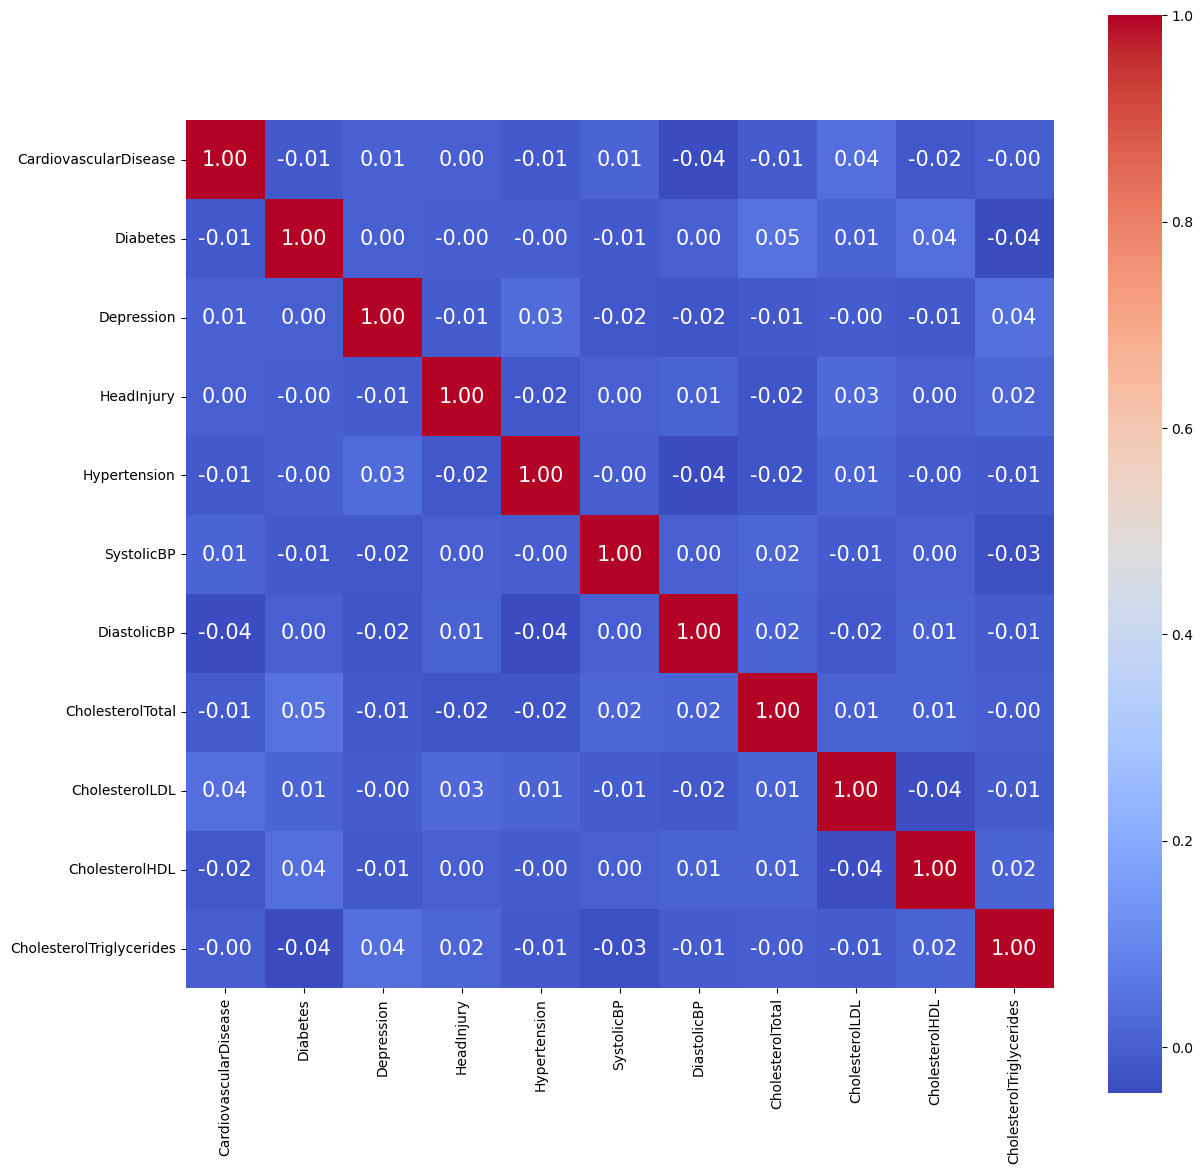

In [18]:
# Correlation
corr = data[features_se].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True, square=True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_se, yticklabels= features_se,
           cmap= 'coolwarm')

**Observation** <br>
- Le rayon, le paramètre et l'aire sont fortement corrélés, comme le prévoit leur relation, de sorte que nous utiliserons n'importe lequel d'entre eux. <br>
- compactness_mean, concavity_mean et concave point_mean sont fortement corrélés, nous utiliserons donc compactness_mean à partir de maintenant.
- En résumé, les paramètres que nous allons maintenir sont : perimeter_mean, texture_mean, compactness_mean, symmetry_mean